In [1]:
# https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL051202

# launch whistler wave from equator,
# lauch particle from some given latitdue to equator
# get the resonance

In [17]:
import numpy as np

# Gauss unit
C = 3e10
M = 9.1094e-28 
Q = 4.8032e-10
B0 = 0.312
# some functions
def get_dipole_Bz(L, z, B0):
    # get the field vector
    # z: latitdue in rad
    # B0 : earth surface equator, Gauss
    lat = z
    cos_lat = np.cos(lat)
    sin_lat = np.sin(lat)
    Bz = B0/(L**3 * cos_lat**6) * np.sqrt(1 + 3 * sin_lat ** 2)
    return Bz

def get_equator_pitchangle(alpha,lat):
    return np.arcsin( (1 + 3 * np.sin(lat)**2)**( -0.25) * np.cos(lat)**3 * np.sin(alpha) )

def get_pitchanlge_numpy(alpha0,lat,signpb):
    tmp = (1 + 3 * np.sin(lat)**2)**0.25 / np.cos(lat)**3 * np.sin(alpha0)
    alpha = np.arcsin(tmp)
    if signpb< 0:
        alpha = np.pi - alpha
    return alpha

def ev2erg(ev):
    return ev * 1.60218e-12
def erg2ev(erg):
    return erg / 1.60218e-12
def e2p(e, E0=M*C**2):
    return np.sqrt(e * (e + 2 * E0)) / C 

def p2e(p, E0=M*C**2):
    return np.sqrt(p**2 * C**2 + E0**2) - E0 

def p2v(p,m= M):
    gamma_m = m * np.sqrt(1 + p**2 /(m * m*C**2)) 
    return p/gamma_m

def v2p(v,m = M):
    gamma_m = m * 1 / np.sqrt(1 - v**2 / c**2)
    return gamma_m * v
    
print(e2p(ev2erg(9800)))
p = e2p(ev2erg(9800))
print(p)
print(p2v(p)/C)


5.374004690415652e-18
5.374004690415652e-18
0.19295152813439975


w/wce 0.2571433515034587
w should be  [  5824.61113263  -4632.30015718 -14686.85377405]


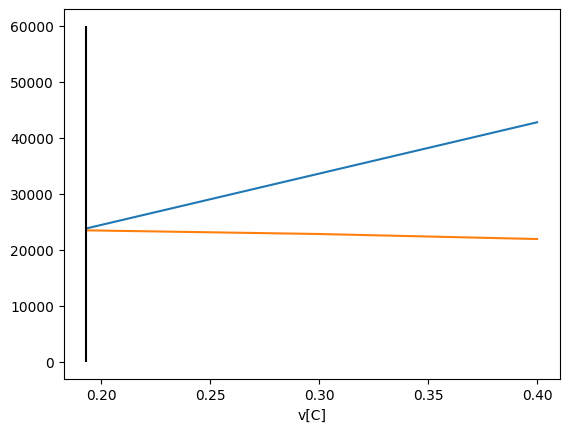

In [21]:
import sympy as sym



def solve_resonance(reslat,frequency,pitch_equator,n0,L,v):

    w = frequency
    alpha0 = pitch_equator
    
    n_lat = n0 * (np.cos(reslat)**-4)
    
    wpe = np.sqrt(4 * np.pi * n_lat*Q**2/M)
    wce =  Q *get_dipole_Bz(L, reslat, B0)/(M*C)
    print('w/wce',w/wce)
    RR = 1 - wpe**2 / ((w-wce) * w)
    k = w *np.sqrt(RR) / C
    # calculate the pitch angle based on the equator
    
    alpha = get_pitchanlge_numpy(alpha0,reslat,-1)
    
    lhs = w - k * v*np.cos(alpha)
    rhs = wce*(1 - (v**2)/C**2)**0.5
    print('w should be ',wce*(1 - (v**2)/C**2)**0.5 +  k * v*np.cos(alpha))
    return lhs ,rhs
import matplotlib.pyplot as plt


reslat = np.deg2rad(10)
pitch_angle_equator = np.deg2rad(30)

frequency = 980*2 *np.pi

n0 = 10
L = 6.4

estimated_v = 0.193* C
#v_check = np.linspace(0.01*C, 0.95 *C,100000)
v_check = np.array([p2v(p),0.3*C,0.4 * C])
result_l,result_r = solve_resonance(reslat,frequency,pitch_angle_equator,n0,L,v_check)
plt.plot(v_check/C,result_l)
plt.plot(v_check/C,result_r)
plt.vlines(x = estimated_v/C,ymin = 0,ymax = 60000,color = 'black')

plt.xlabel('v[C]')
plt.show()

In [20]:
print(p2v(p)/C)

0.19295152813439975


In [15]:
print(p)

5.374004690415652e-18


wave_number 1.5703340172204512e-06


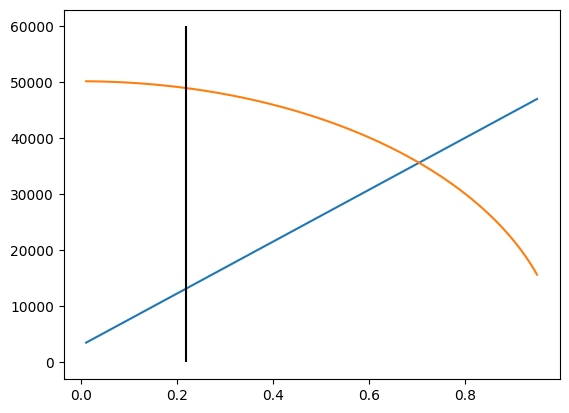

In [19]:
reslat = np.deg2rad(10)
pitch_angle_equator = np.deg2rad(10)

frequency = 980 * np.pi 
n0 = 5
L = 6

estimated_v = p2v(e2p(ev2erg(12700)))
v_check = np.linspace(0.01*C, 0.95 *C,100000)

result_l,result_r = solve_resonance(reslat,frequency,pitch_angle_equator,n0,L,v_check)
plt.plot(v_check/C,result_l)
plt.plot(v_check/C,result_r)
plt.vlines(x = estimated_v/C,ymin = 0,ymax = 60000,color = 'black')
plt.show()

In [11]:
3000 * 6

18000

In [22]:
980 * 2 * np.pi

6157.5216010359945